In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
data = pd.read_csv('../src/data/TEI_BRS_data - Sheet1.csv')
data.head()

In [92]:
data.head()

age = data["Age"]
age_counts = data["Age"].value_counts()
age_index = data["Age"].index
age_counts_index = age_counts.index

print(type(age))
# print(age)
print(type(age_counts))
# print(age_counts)
print(type(age_index))
# print(age_index)
print(type(age_counts_index))
print(age_counts_index)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.range.RangeIndex'>
<class 'pandas.core.indexes.base.Index'>
Index([22, 21, 19, 20, 23, 18, 25], dtype='int64', name='Age')


Text(0.5, 0, 'Age')

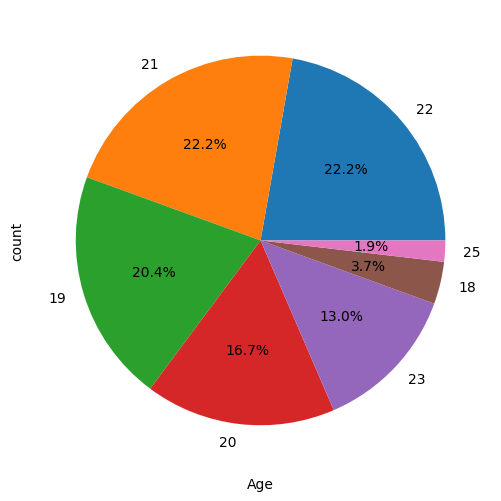

In [214]:
plot = data["Age"].value_counts().plot(kind="pie", figsize=(6,6), autopct="%1.1f%%")
plot.set_xlabel('Age')

In [215]:
gender_mapping = {1: "Male", 2: "Female", 3: "Other"}
data['Gender'] = data["Gender"].map(gender_mapping)
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,Other,2,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,Female,2,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,Male,3,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,Female,2,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,Female,7,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


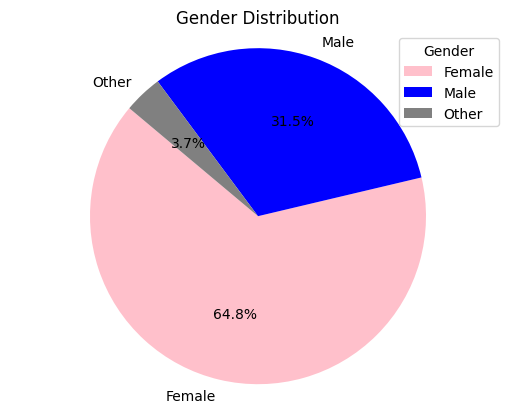

In [216]:
colors = ["pink", "blue", "gray"]
genders = data["Gender"]
legend_labels = genders.value_counts().index

plt.pie(genders.value_counts(), labels=genders.value_counts().index, colors=colors, autopct="%1.1f%%", startangle=140)
plt.legend(legend_labels, title="Gender", loc="upper right")
plt.title("Gender Distribution")
plt.axis('equal') 

genders.value_counts()
plt.show()


In [27]:
gender_counts = data["Gender"].value_counts()
gender_percentage = (gender_counts / len(data)) * 100
# gender_percentage = gender_percentage.round(2).astype(str) + "%"
gender_summary = pd.DataFrame({'Gender': gender_counts.index, 'Frequency': gender_counts.values, 'Percentage': gender_percentage.values})
gender_summary = gender_summary.sort_values(by="Frequency", ascending=False)
total_row = pd.DataFrame({'Gender': ['Total'], 'Frequency': [gender_counts.sum()], 'Percentage': [gender_percentage.sum()]})
gender_summary = pd.concat([gender_summary, total_row], ignore_index=True)
gender_summary


,Gender,Frequency,Percentage
0,2,35,64.814815
1,1,17,31.481481
2,3,2,3.703704
3,Total,54,100.000000


In [26]:
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,3,College of Arts and Sciences,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,2,College of Arts and Sciences,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,1,College of Business and Administration,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,2,College of Arts and Sciences,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,2,College of Engineering and Design,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


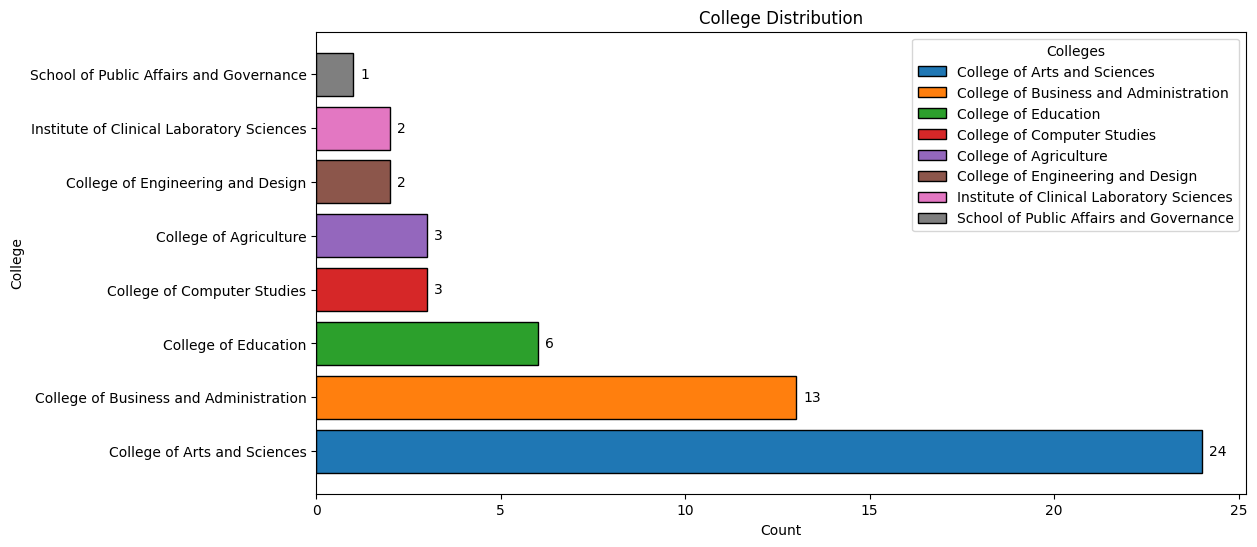

In [101]:
data = pd.read_csv('../src/data/TEI_BRS_data - Sheet1.csv')
college_mapping = {
    1: "College of Agriculture", 
    2: "College of Arts and Sciences", 
    3: "College of Business and Administration", 
    4: "College of Computer Studies", 
    5: "Divinity School", 
    6: "College of Education", 
    7: "College of Engineering and Design", 
    8: "College of Mass Communication", 
    9: "Medical School", 
    10: "College of Nursing", 
    11: "College of Performing and Visual Arts", 
    12: "Graduate Program", 
    13: "School of Public Affairs and Governance", 
    14: "Institute of Clinical Laboratory Sciences", 
    15: "Institute of Environmental and Marine Sciences", 
    16: "Institute of Rehabilitative Sciences", 
    17: "Senior High School"
}

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f",
    "#bcbd22", "#17becf", "#1a55FF", "#FF1A1A",
    "#1AFF1A", "#FF1A8C", "#1A8CFF", "#FF8C1A",
    "#8C1AFF"  
]

data["College"] = data["College"].map(college_mapping)
data["College"].value_counts()
college_counts = data["College"].value_counts()
legend_labels = college_counts.index

plt.figure(figsize=(12, 6))
for i, college in enumerate(college_counts.index):
    plt.barh(college, college_counts[college], color=colors[i], edgecolor='black', label=college)
    plt.text(college_counts[college] + 0.2 , i, str(college_counts[college]), va='center', fontsize=10)

plt.legend(title="Colleges", loc="upper right")
plt.xlabel('Count')
plt.ylabel('College')
plt.title('College Distribution')

plt.show()

In [25]:
college_percentage = (college_counts / len(data) * 100).round(2)
percentage_copy = college_percentage
college_summary = pd.DataFrame({"College": college_counts.index, "Frequency": college_counts.values, "Percentage": college_percentage.values})

college_counts_total = college_counts.sum()
college_percentage_total = college_percentage.sum().astype(str) + "%"

total_row = pd.DataFrame({"College": ["Total"], "Frequency": college_counts_total, "Percentage": college_percentage_total})
college_summary = pd.concat([college_summary, total_row], ignore_index=True)
college_summary

,College,Frequency,Percentage
0,College of Arts and Sciences,24,44.44
1,College of Business and Administration,13,24.07
2,College of Education,6,11.11
3,College of Computer Studies,3,5.56
4,College of Agriculture,3,5.56
5,College of Engineering and Design,2,3.7
6,Institute of Clinical Laboratory Sciences,2,3.7
7,School of Public Affairs and Governance,1,1.85
8,Total,54,99.99%


In [39]:
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,Other,2,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,Female,2,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,Male,3,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,Female,2,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,Female,7,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


In [40]:
correlation = data["Self-Control"].corr(data["BRS"])
print(correlation)

0.532631702555775


In [41]:
data.head()

,ID,Age,Gender,College,Global score,Well-being,Self-Control,Emotionality,Sociability,BRS,TEI_Mean,BRS_Mean
0,1,18,Other,2,4.13,2.83,4.33,4.50,4.67,4.33,4.09,4.33
1,2,22,Female,2,3.57,3.83,3.67,2.63,4.33,3.00,3.61,3.00
2,3,22,Male,3,4.67,5.50,4.83,4.75,3.83,3.33,4.72,3.33
3,4,19,Female,2,5.10,5.17,4.83,5.13,5.00,3.50,5.05,3.50
4,5,23,Female,7,4.80,5.50,4.00,5.13,4.67,2.83,4.82,2.83


In [97]:
data = pd.read_csv('../src/data/TEI_BRS_data - Sheet1.csv')
def format_column(df, column_name, decimals=2, suffix="%"):
  formatted_column = (df[column_name].round(decimals).astype(str) + suffix)
  return formatted_column

def round_off_values(column_name, decimals=2, suffix="%"):
  formatted_column = column_name.round(decimals)
  return formatted_column

def summarize_data(data, column_name):
  row_data = data[column_name]
  row_stats = data[column_name].describe()
  kurtosis_value = stats.kurtosis(row_data)
  skew_value = stats.skew(row_data)
  
  stats_summary = pd.DataFrame({
      "Mean": round_off_values(row_stats["mean"]),
      "STD": round_off_values(row_stats["std"]),
      "Min": round_off_values(row_stats["min"]),
      "Kurtosis": round_off_values(kurtosis_value),
      "Skew": round_off_values(skew_value),
      "25% Percentile": format_column(row_stats, "25%"),
      "50% Percentile": format_column(row_stats, "50%"),
      "75% Percentile": format_column(row_stats, "75%")
    }, index=[column_name]
  )
  return stats_summary

global_summary = summarize_data(data, "Global score")
well_being_summary = summarize_data(data, "Well-being")
self_control_summary = summarize_data(data, "Self-Control")
emotionality_summary = summarize_data(data, "Emotionality")
sociability = summarize_data(data, "Sociability")
brs_summary = summarize_data(data, "BRS")
tei_summary = summarize_data(data, "TEI_Mean")

data_frames_list = [
  global_summary,
  well_being_summary,
  self_control_summary,
  emotionality_summary,
  sociability,
  brs_summary,
  tei_summary
]

summary_df = pd.concat(data_frames_list)
mean_data = summary_df["Mean"]
mean_counts = mean_data.value_counts()

print(mean_counts)

Mean
4.76    1
5.07    1
4.34    1
4.90    1
4.69    1
3.29    1
4.75    1
Name: count, dtype: int64
